# Comportamiento del precio de las acciones "AMERICA MOVIL SAB DE CV (claro) " utilizando API de Yahoo
 Metodología Forecasting acciones Empresa Claro

Se intenta predecir el comportamiento de precios, de la accion (AMERICA MOVIL SAB DE CV (AMXVF)) empresa dedicada a la industria de telecomunicaciones, , donde se utilizará la API de Yahoo Finance

## Obtección de data 

Se extraera la data del sito web yahoo, mediante acceso API

Primero hay que instalar el SDK del sitio web

pip install yahoo-finance-api2 o 
pip install yfinance

In [40]:
# importar librerias 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sktime
from sktime.utils.plotting import plot_series
# !pip install sktime[all_extras]
# !pip install sktime

#import librerias de Yahoo Finance
import datetime as dt
import yfinance as yf

In [41]:
# importar data 

#defirnir la etiqueta compañia 
company = 'AMXVF'

# Define a start date and End Date
start = dt.datetime(2014,1,5)  
end =  dt.datetime(2023,2,8)

# Cargara data, si no se incluyen los parametros "start y end" se obtiene toda la data disponible

df = yf.download(company, start, end)
df.shape

[*********************100%***********************]  1 of 1 completed


(2289, 6)

In [42]:
# Mostrar los datos
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-06,1.16,1.16,1.16,1.16,1.096783,3200
2014-01-07,1.10,1.10,1.10,1.10,1.040053,3000
2014-01-08,1.10,1.10,1.10,1.10,1.040053,0
2014-01-09,1.10,1.10,1.10,1.10,1.040053,0
2014-01-10,1.10,1.10,1.10,1.10,1.040053,0
...,...,...,...,...,...,...
2023-02-01,1.04,1.04,1.04,1.04,1.040000,1100
2023-02-02,1.04,1.04,1.04,1.04,1.040000,0
2023-02-03,1.04,1.04,1.04,1.04,1.040000,0


# Predicción de la serie temporal 

Se utilizará el metodo de PyCaret

Esta librería trabaja con pandas series 

In [43]:
# instalar pycaret
#! pip install pycaret[full]
#! pip install pycaret
#! ip install time-series-test
#! conda install -c conda-forge sktime-all-extras
#! pip install --pre pycaret

In [44]:
# import librerias 
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

In [45]:
# Se crea la variable "idex", la cual contiene la fecha 
index= pd.DatetimeIndex(df.index)

#Seleccionar la columna a evaluar y se transforma a serie de numpy
data= df['Close'].to_numpy()

# se crea la serie temporal donde se especifica la variable y la fecha 
df_serie= pd.Series(data= data, index=index)

In [46]:
# Mostrar las serie
df_serie

Date
2014-01-06    1.16
2014-01-07    1.10
2014-01-08    1.10
2014-01-09    1.10
2014-01-10    1.10
              ... 
2023-02-01    1.04
2023-02-02    1.04
2023-02-03    1.04
2023-02-06    1.04
2023-02-07    0.99
Length: 2289, dtype: float64

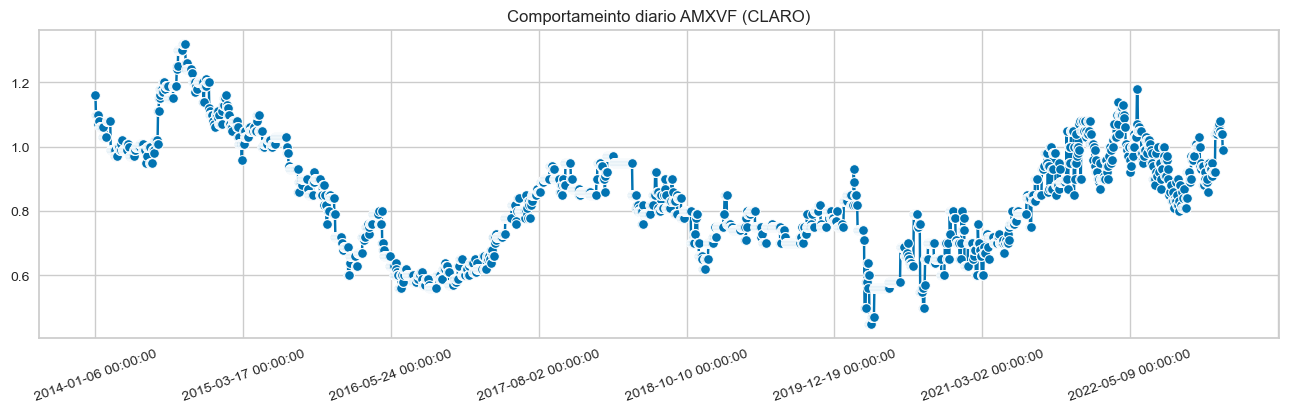

In [47]:
# garaficar la serie 
from sktime.utils.plotting import plot_series 

fig, ax= plot_series(df_serie)
ax.tick_params(axis='x', rotation=20)
plt.title("Comportameinto diario AMXVF (CLARO)")
plt.show()

Utiluzando la librería pandas, se hace un "resample" Cambiando la periodicidad de diario a semanal, con esto visualizando de mejor manera la data 

In [48]:
# resample, se promedian los semana
df_serie_semana = df_serie.resample('W').mean()

Text(0.5, 1.0, 'Comportameinto semanal AMXVF (CLARO)')

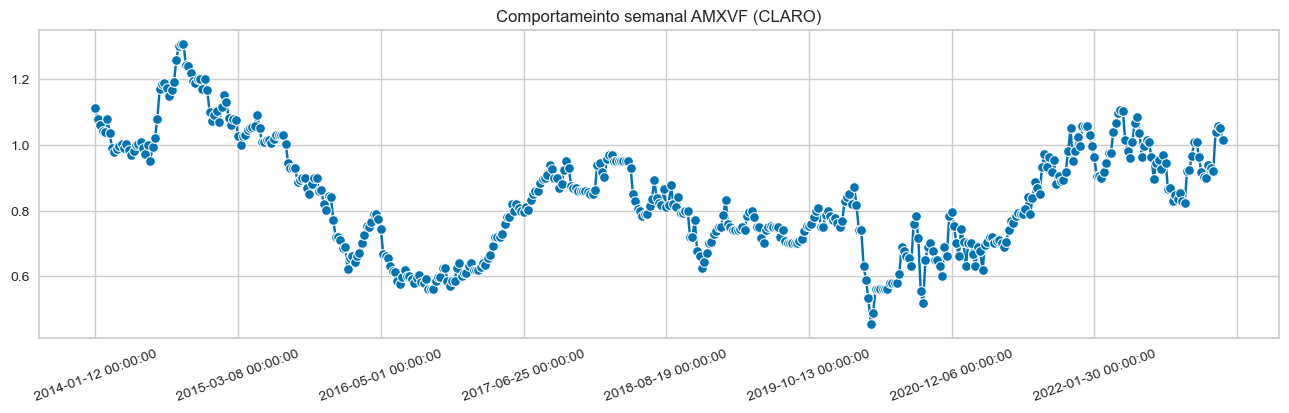

In [49]:
fig, ax= plot_series(df_serie_semana)
ax.tick_params(axis='x', rotation=20)
plt.title("Comportameinto semanal AMXVF (CLARO)")

# Diseñar experimento 

En este apartado se diseña el experimento utiizando el framework pycaret

In [50]:
# init setup
from pycaret.time_series import *
# crear el experiemento, donde el parametro fh es e horizonte de forcasting
exp = setup(data= df_serie_semana, fh=12, session_id= 100, use_gpu=True)

,Description,Value
0,session_id,100
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(475, 1)"
5,Transformed data shape,"(475, 1)"
6,Transformed train set shape,"(463, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [51]:
# comparación de modelos, se seleccionarán los 3 modelos con mejor (MEDIAN ABSOLUTE ERROR)  "MAE"
#con el parametro "n_select = 3" guardo los 3 mejores modelos
best_baseline = exp.compare_models(n_select= 3, sort="MAE")

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,2.3239,1.8554,0.0556,0.0631,0.0580,0.0579,-0.6607,0.8767
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.7271,2.2117,0.0652,0.0752,0.0683,0.0676,-1.4334,0.4300
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.7648,2.1958,0.0662,0.0747,0.0702,0.0683,-1.7409,1.4700
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,2.8634,2.4709,0.0683,0.0839,0.0703,0.0700,-2.8276,0.4567
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,3.0574,2.4490,0.0731,0.0833,0.0764,0.0745,-2.4042,0.8000
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,3.1524,2.4539,0.0755,0.0835,0.0804,0.0775,-2.6613,0.4133
croston,Croston,3.3650,2.7019,0.0805,0.0919,0.0855,0.0837,-2.4796,0.0567
arima,ARIMA,3.4765,2.7149,0.0831,0.0923,0.0868,0.0853,-3.0726,0.2333
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.5572,2.7912,0.0850,0.0949,0.0893,0.0866,-3.7790,0.4600
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,3.5735,2.7428,0.0853,0.0932,0.0880,0.0882,-3.0152,0.5267


Processing:   0%|          | 0/115 [00:00<?, ?it/s]

### Se entrenan los parametros de los mejores 3 modeos

In [52]:
Best_tuned_models = [exp.tune_model(model) for model in best_baseline]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-03-07/2022-03-13,6.2642,4.6375,0.1479,0.1565,0.1400,0.1516,-8.6543
1,2022-05-30/2022-06-05,1.7387,1.3942,0.0415,0.0474,0.0433,0.0427,-0.5481
2,2022-08-22/2022-08-28,5.4799,4.1517,0.1327,0.1421,0.1550,0.1422,-4.9974
Mean,NaT,4.4943,3.3945,0.1074,0.1154,0.1128,0.1122,-4.7332
SD,NaT,1.9746,1.4282,0.0470,0.0484,0.0495,0.0493,3.3146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.8s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-03-07/2022-03-13,2.1403,1.7867,0.0505,0.0603,0.0476,0.0488,-0.4331
1,2022-05-30/2022-06-05,5.4369,4.0566,0.1299,0.1380,0.1362,0.1264,-12.1053
2,2022-08-22/2022-08-28,3.2431,2.6326,0.0786,0.0901,0.0925,0.0872,-1.4115
Mean,NaT,3.6068,2.8253,0.0863,0.0961,0.0921,0.0874,-4.6500
SD,NaT,1.3702,0.9366,0.0328,0.0320,0.0362,0.0317,5.2869


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-03-07/2022-03-13,5.7283,4.2865,0.1353,0.1447,0.1278,0.1377,-7.2480
1,2022-05-30/2022-06-05,1.5468,1.2779,0.0369,0.0435,0.0381,0.0381,-0.3005
2,2022-08-22/2022-08-28,4.9373,3.8047,0.1196,0.1303,0.1401,0.1292,-4.0367
Mean,NaT,4.0708,3.1230,0.0973,0.1061,0.1020,0.1017,-3.8617
SD,NaT,1.8137,1.3195,0.0431,0.0447,0.0454,0.0450,2.8390


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.3s finished


In [53]:
Best_tuned_models

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                    n_jobs=1)],
                     regressor=RandomForestRegressor(n_jobs=-1,
                                                     random_state=100),
                     window_length=1),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                    n_jobs=1)],
                     regressor=GradientBoostingRegressor(random_state=100),
                     window_length=1),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                    n_jobs=1)],
                     regressor=LGBMRegressor(device='gpu', random_state=100),
                     window_length=1)]

# En esta seccion se promedia las estimaciones de los mejor modelos, con el metodo mean o media 

In [54]:
blend_model = exp.blend_models(Best_tuned_models, method = "mean")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-03-07/2022-03-13,2.6897,2.1954,0.0635,0.0741,0.0594,0.0617,-1.1637
1,2022-05-30/2022-06-05,1.6413,1.3558,0.0392,0.0461,0.0412,0.0401,-0.4639
2,2022-08-22/2022-08-28,2.7775,2.1898,0.0673,0.0750,0.0783,0.0752,-0.6684
Mean,NaT,2.3695,1.9137,0.0567,0.0651,0.0597,0.0590,-0.7653
SD,NaT,0.5162,0.3945,0.0124,0.0134,0.0151,0.0145,0.2938


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# hacer predicción de los modelos con la media de los mejores modelos 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,2.4367,1.8582,0.0596,0.0641,0.0623,0.0612,-0.2222


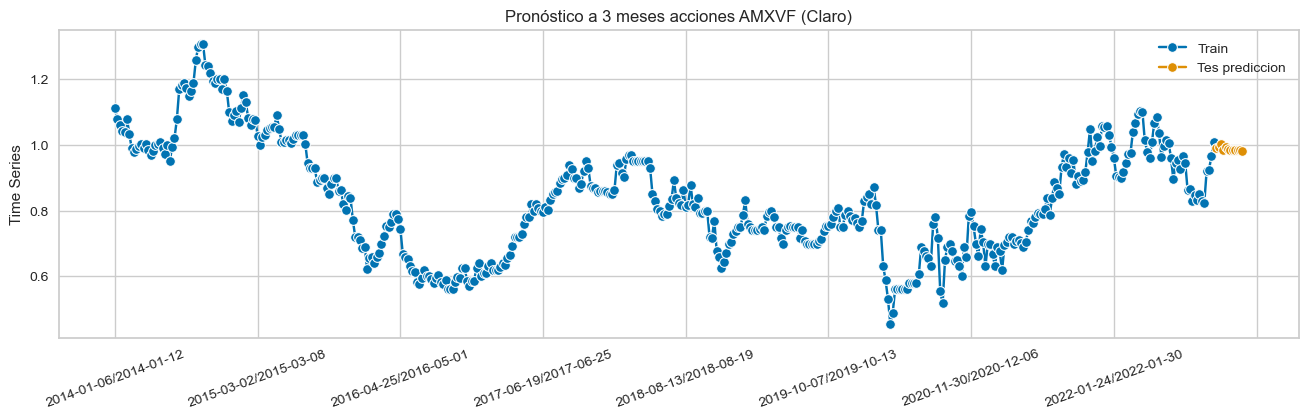

In [55]:
y_train= exp.get_config('y_train')
y_predict= exp.predict_model(blend_model)

fig, ax= plot_series(y_train, y_predict, labels =['Train', 'Tes prediccion'])
ax.tick_params(axis='x', rotation=20)
ax.set_title("Pronóstico a 3 meses acciones AMXVF (Claro)")
plt.show()

A fin de obtener estimaciones robustas, se ensamblan los 3 modelos con mejores propiedades estadísticas, los cuales predicen estabilidad en las acciones de la empresa AMERICA MOVIL SAB DE CV (AMXVF)) en los próximos 3 mes.